3.3933796421571425
3.9332288186749995
3.4790398319035716
4.027664978841666
3.446988339510715
4.017667263325
3.459780322207143
4.025508565541666
3.4974125986214286
4.072675755116666
3.471561016010714
4.038537201808333
3.483286697710714
4.041394595458334
3.4951211698464286
4.076403832233334
3.4538779413035714
4.0265321114749995
3.4558544858607143
4.026057089141667
3.4949276553714284
4.063008513241667
3.478466527228571
4.0404959537
3.4542506246107143
4.0221911079
3.4137617431678575
3.9637020883750003


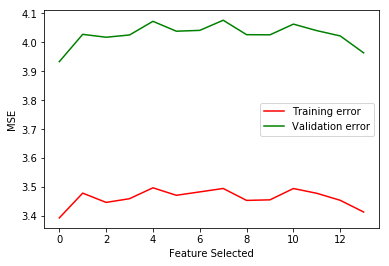

In [192]:
import numpy as np
#np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import train_test_split


Xtr=np.genfromtxt("/Users/dharshanbj/Desktop/X_train_project1.txt",delimiter=None)
Ytr=np.genfromtxt("/Users/dharshanbj/Desktop/Y_train_project1.txt",delimiter=None)
XTest=np.genfromtxt("/Users/dharshanbj/Desktop/X_test_project1.txt",delimiter=None)

# Xtr,Xva,Ytr,Yva = ml.splitData(Xtr,Ytr,0.7)
# learner = ml.knn.knnClassify() # TODO: complete code to train model
# learner.train(Xtr[:,0:1], Ytr, 120)
# YTraining = learner.predict(Xtr[:,0:1])
# YValidation = learner.predict(Xva[:,0:1])
# neigh = KNeighborsRegressor(n_neighbors=120)
# neigh.fit(Xtr[:,0:1], Ytr)
# YTraining=neigh.predict(Xtr[:,0:1])
# YVal=neigh.predict(Xva[:,0:1])

Xtr,Xva,Ytr,Yva = ml.splitData(Xtr,Ytr,0.7)
MSE_train=[]
MSE_validation=[]
# neighbors=[500]
#values=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
for i in range(0,14):
    neigh = KNeighborsRegressor(n_neighbors=1000)
    neigh.fit(Xtr[:,i:i+1], Ytr)
    YTraining=neigh.predict(Xtr[:,i:i+1])
    YValidation=neigh.predict(Xva[:,i:i+1])
    MSE_train.append(mean_squared_error(Ytr,YTraining))
    MSE_validation.append(mean_squared_error(Yva,YValidation))
    print(mean_squared_error(Ytr,YTraining))
    print(mean_squared_error(Yva,YValidation))


plt.plot(values,MSE_train,c='red',label='Training error')
plt.plot(values,MSE_validation,c='green',label='Validation error')
plt.xlabel('Feature Selected')
plt.ylabel('MSE')
plt.legend()


#print(YTest)
# knn.train(Xtr[:,[0,6,8]], Ytr, 300) # where K is an integer, e.g. 1 for nearest neighbor predict
# YvaHat = knn.predict(XTest[:,[0,6,8]]) # get estimates of y for each data point in Xva4
# print(mean_squared_error(YvaHat,Yval))
# YvaHat=np.axis(YvaHat,axis=1)

# np.savetxt('/Users/dharshanbj/Desktop/YKnn_final_prediction_3.txt',
# np.vstack( (np.arange(len(YvaHat)) , YvaHat[:,0]) ).T,
# '%d, %.2f',header='ID,Prediction',comments='',delimiter=',');

#Xtr=X[0:20000,:]
#Ytr=Y[0:20000:]

# XTest=XTest[:,[0,6,8,11]]
# print(XTest)

#Xtr,Xva,Ytr,Yva = ml.splitData(Xtr,Ytr,0.8) #first 10000 training ,next 10000 is testing data set

#Xval=X[1000:2000,:]
#Yval=Y[1000:2000:]

#YvaHat=np.zeros((np.size(XTest,0),1))

#knn = ml.knn.knnRegress()
#knn.train(Xtr[:,[0,6,8]], Ytr, 300) # where K is an integer, e.g. 1 for nearest neighbor predict
#YvaHat = knn.predict(XTest[:,[0,6,8]]) # get estimates of y for each data point in Xva4
#print(mean_squared_error(YvaHat,Yval))
#YvaHat=np.axis(YvaHat,axis=1)

#np.savetxt('/Users/dharshanbj/Desktop/YKnn_final_prediction_3.txt',
#np.vstack( (np.arange(len(YvaHat)) , YvaHat[:,0]) ).T,
#'%d, %.2f',header='ID,Prediction',comments='',delimiter=',');

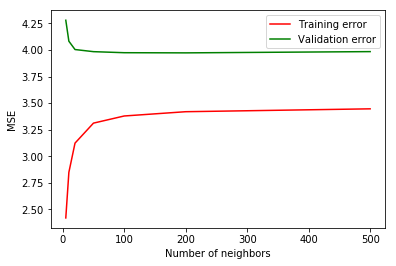

In [156]:
plt.plot(neighbors,MSE_train,c='red',label='Training error')
plt.plot(neighbors,MSE_validation,c='green',label='Validation error')
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')
plt.legend()

Random forest

In [66]:
#Random Forest of size 25
# Load data set X, Y for training the ensemble…

#Data Processing
#x=Xtr[:,0]
#training data processing
# mDP=Xtr.shape[0]
# xnew = np.zeros((mDP,14))

# TestDP=XTest.shape[0]
# xTestnew=np.zeros((TestDP,14))

# #Target feature processing
# nDP=Ytr.shape[0]
# ynew = (Ytr - np.mean(Ytr, axis=0))/np.std(Ytr, axis=0)

# for i in range(14):
#     x=Xtr[:,i]
#     k=XTest[:,i]
#     xnew[:,i] = (x - np.mean(x, axis=0))/np.std(x, axis=0)
#     xTestnew[:,i]= (k - np.mean(k, axis=0))/np.std(k, axis=0)
    
#     #print(xnew)
# #print('Mean = {}, Standard dev = {}'.format(np.mean(x, axis=0), np.std(x, axis=0)))


#x = (Xtr - np.mean(Xtr, axis=0))/np.std(Xtr, axis=0);
#xtest=(XTest - np.mean(XTest, axis=0))/np.std(XTest, axis=0);


m,n = Xtr.shape


maxDepth=[120,140,160]
powers=[4,8,16,32,64,128,256]
powers1=[4,8,16]
n=[8,10,12,14]


#grid = GridSearchCV(estimator=ml.dtree.treeRegress(), param_grid=dict(maxDepth=maxDepth,minLeaf=minLeaf,nFeatures=n))
  
learners=[140]
for i in powers:
    ensemble = [ None ] * 140 # Allocate space for learners
    n=12
    for j in range(140):
        #ind = np.floor( m * np.random.rand(n) ).astype(int)
        #Xb, Yb = Xtr[ind,:],Ytr[ind]
        Xb,Yb=ml.bootstrapData(Xtr,Ytr)
        ensemble[j]=ml.dtree.treeRegress(Xb,Yb, maxDepth=120,minLeaf=i,nFeatures=n) 
        #grid_result = grid.fit(Xb, Yb)
        
        
    # test on data Xtestnew
    mTr = Xtr.shape[0]
    mval=Xva.shape[0]
    predictTr = np.zeros( (mTr, 140) ) # Allocate space for predictions from each model
    predictVal = np.zeros( (mval, 140) ) # Allocate space for predictions from each model
    for i in range(140):
        predictTr[:,i] = ensemble[i].predict(Xtr) # Apply each classifier
        predictVal[:,i] = ensemble[i].predict(Xva)
           
    predictTr = np.mean(predictTr, axis=1)
    predictVal = np.mean(predictVal, axis=1)
    print(mean_squared_error(predictTr,Ytr))
    print(mean_squared_error(predictVal,Yva))


#fpr,tpr,_ = roc_curve(Yva, Yhatval)
#roc_auc = auc(fpr, tpr)

#plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %f)'%roc_auc)
#plt.legend()
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#print(grid_result.best_score_)
#print(grid_result.best_params_)
# Now output a file with two columns, a row ID and a confidence in class 1:
# np.savetxt('/Users/dharshanbj/Desktop/Yhat_dtree_project1_treeRegress_data_processed_new2.txt',
# np.vstack( (np.arange(len(predictTr)) , predictTr) ).T,'%d, %.2f',header='ID,Prediction',comments='',delimiter=',');

1.6333103390039136
3.608624228164741
2.1393728574655957
3.5817353728109382
2.5369180934615287
3.5667206189829312
2.82316232229666
3.583382331112345
3.0264186594929288
3.5996458057793075
3.1592921510814787
3.619455862801691
3.2520464950066725
3.6396760659373424


In [51]:
Xtr=Xtr[:100,:]
print(Xtr)
x = (Xtr - np.mean(Xtr, axis=0))/np.std(Xtr, axis=0)
print(x)
#print('Mean = {}, Standard dev = {}'.format(np.mean(x, axis=0), np.std(x, axis=0)))

[[236.     222.     241.37   ...   1.919    1.4416   0.    ]
 [234.5    226.     237.9    ...   4.8602   1.6336   8.2   ]
 [232.     227.     240.     ...   1.8038   3.3741  22.1   ]
 ...
 [251.     229.     243.27   ...   1.091    6.0443   0.    ]
 [244.     226.     241.53   ...   2.1101   4.224    0.    ]
 [250.     224.     241.32   ...   3.4507   1.7058   0.    ]]
[[-0.33760371 -0.31363554  0.19674748 ... -0.60125048 -0.73653462
  -0.36271118]
 [-0.47996444  0.09368334 -0.3923575  ...  1.5575069  -0.71478002
  -0.1945805 ]
 [-0.71723231  0.19551306 -0.03583863 ... -0.68580402 -0.51757237
   0.0904215 ]
 ...
 [ 1.08600353  0.3991725   0.51931218 ... -1.208979   -0.21502489
  -0.36271118]
 [ 0.42165348  0.09368334  0.22391083 ... -0.4609885  -0.4212743
  -0.36271118]
 [ 0.99109638 -0.1099761   0.18825894 ...  0.52297388 -0.70659939
  -0.36271118]]


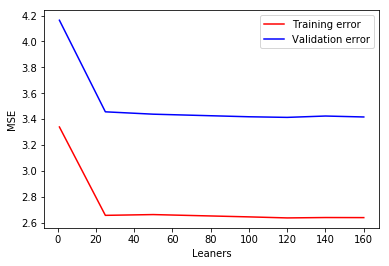

In [19]:
learners=[1,25,50,100,120,140,160]
MSE_train=[3.3393632139565543,2.6569885998506524,2.6629926270524855,2.645187293598176,2.637183979189863,2.6401720417578445,2.63954868477061]
plt.plot(learners,MSE_train,c='red',label='Training error')
plt.xlabel("Leaners")
plt.ylabel("MSE")

MSE_validation=[4.1635482270094375,3.4564228938300827,3.4381771287892073,3.418233713419079,3.4134801549799723,3.423897531177156,3.416669636720516]
plt.plot(learners,MSE_validation,c='blue',label='Validation error')
plt.legend()

Ada Boost

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()                             

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

#X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
#X_train, X_test = X[:200], X[200:]
#y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(n_estimators=120, max_depth=50, random_state=0, loss='ls').fit(X, Y)

YvaHat=np.zeros((np.size(XTest,0),1))
YvaHat=est.predict(XTest)
#print(Y_test)
# Now output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('/Users/dharshanbj/Desktop/Yhat_dtree_project1_GradientBoost_120.txt',
np.vstack( (np.arange(len(Y_test)) , Y_test) ).T,'%d, %.2f',header='ID,Prediction',comments='',delimiter=',');

In [43]:
# #Data Processing
# #x=Xtr[:,0]
# mDP=Xtr.shape[0]
# xnew = np.zeros((mDP,14))

# for i in range(14):
#     x=Xtr[:,i]
#     xnew[:,i] = (x - np.mean(x, axis=0))/np.std(x, axis=0)
#     #print(xnew)
# #print('Mean = {}, Standard dev = {}'.format(np.mean(x, axis=0), np.std(x, axis=0)))


#Data Processing
#x=Xtr[:,0]
#training data processing
mDP=Xtr.shape[0]
xnew = np.zeros((mDP,14))

TestDP=XTest.shape[0]
xTest=np.zeros((TestDP,14))

#Target feature processing
nDP=Ytr.shape[0]
ynew = (Ytr - np.mean(Ytr, axis=0))/np.std(Ytr, axis=0)

for i in range(14):
    x=Xtr[:,i]
    k=XTest[:,i]
    xnew[:,i] = (x - np.mean(x, axis=0))/np.std(x, axis=0)
    xTest[:,i]= (k - np.mean(k, axis=0))/np.std(k, axis=0)
    
    #print(xnew)
#print('Mean = {}, Standard dev = {}'.format(np.mean(x, axis=0), np.std(x, axis=0)))



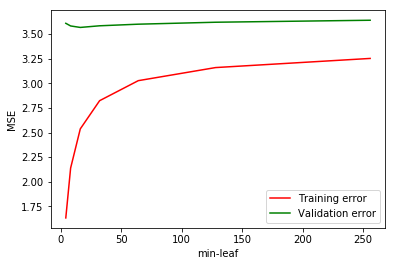

In [68]:
# 1.6333103390039136
# 3.608624228164741
# 2.1393728574655957
# 3.5817353728109382
# 2.5369180934615287
# 3.5667206189829312
# 2.82316232229666
# 3.583382331112345
# 3.0264186594929288
# 3.5996458057793075
# 3.1592921510814787
# 3.619455862801691
# 3.2520464950066725
# 3.6396760659373424

powers=[4,8,16,32,64,128,256]
MSE_train=[1.6333103390039136,2.1393728574655957,2.5369180934615287,2.82316232229666,3.0264186594929288,3.1592921510814787,3.2520464950066725]
MSE_validation=[3.608624228164741,3.5817353728109382,3.5667206189829312,3.583382331112345,3.5996458057793075,3.619455862801691,3.6396760659373424]
plt.plot(powers,MSE_train,c='red',label='Training error')
plt.plot(powers,MSE_validation,c='green',label='Validation error')
plt.xlabel("min-leaf")
plt.ylabel("MSE")
plt.legend()

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import mltools as ml 

import xgboost as xgb
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV

X_train=np.genfromtxt("/Users/dharshanbj/Desktop/X_train_project1.txt",delimiter=None)
Y_train=np.genfromtxt("/Users/dharshanbj/Desktop/Y_train_project1.txt",delimiter=None)


Xtr=X_train
Ytr=Y_train

model=xgb.XGBRegressor()

n_estimators=[100,150]
# max_depth=[80,100,120,140]
# learning_rate=[0,0.2,0.4,0.8]
# subsample=[0.5,0.8,1]


grid = GridSearchCV(estimator=model, param_grid=dict(n_estimators=n_estimators,max_depth=max_depth,gamma=gamma,learning_rate=learning_rate,subsample=subsample))
grid_result = grid.fit(Xtr, Ytr)


print(grid_result.best_score_)
print(grid_result.best_params_)

ModuleNotFoundError: No module named 'xgboost'

Feature  1


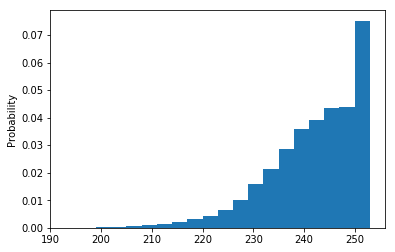

Feature  2


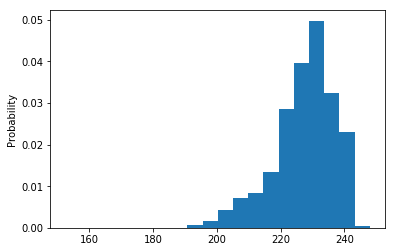

Feature  3


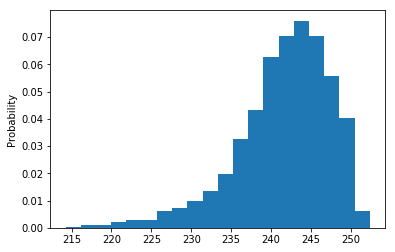

Feature  4


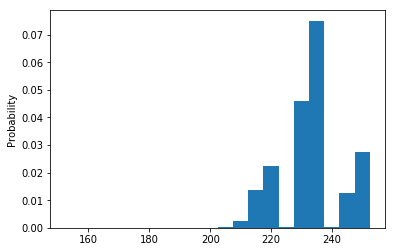

Feature  5


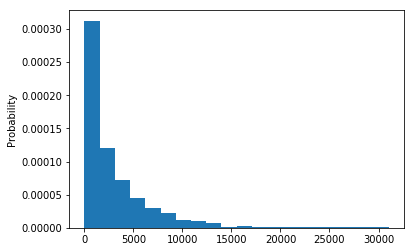

Feature  6


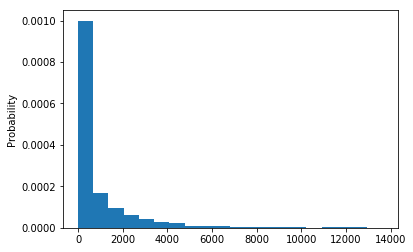

Feature  7


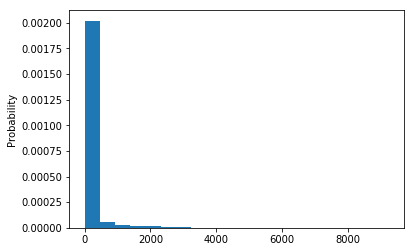

Feature  8


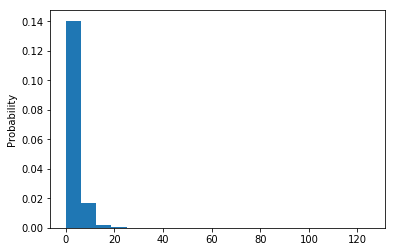

Feature  9


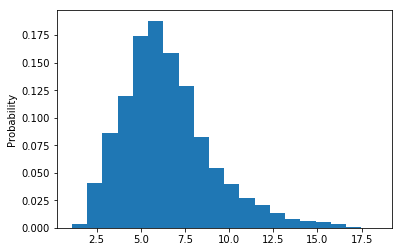

Feature  10


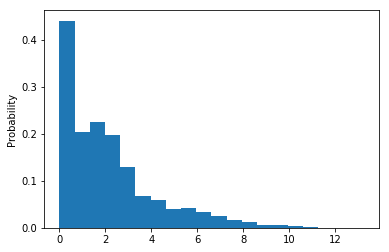

Feature  11


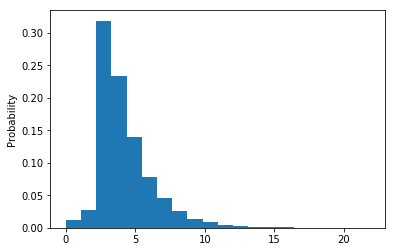

Feature  12


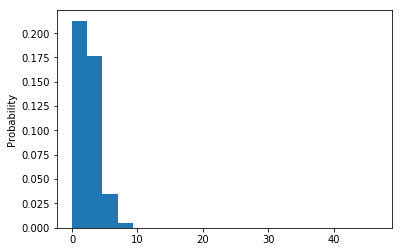

Feature  13


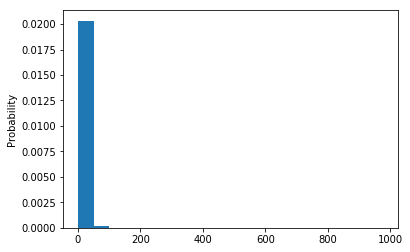

Feature  14


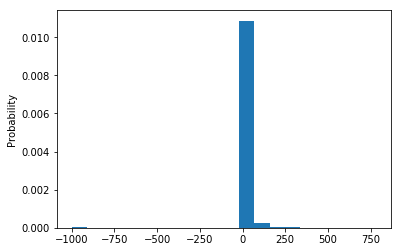

In [148]:
#Histograms
Xtr=np.genfromtxt("/Users/dharshanbj/Desktop/X_train_project1.txt",delimiter=None)
Ytr=np.genfromtxt("/Users/dharshanbj/Desktop/Y_train_project1.txt",delimiter=None)
XTest=np.genfromtxt("/Users/dharshanbj/Desktop/X_test_project1.txt",delimiter=None)
import matplotlib.pyplot as plt
for i in range(14):
    print("Feature ",i+1)
    plt.hist(Xtr[:,i], normed=True,bins=20)
    plt.ylabel('Probability');
    plt.show()

In [99]:
import pandas as pd
#data_dummies=pd.get_dummies(Xtr[:,3])

for i in Xtr[:,3]:
      if i<222:
        Xtr[i,3]=215  elif i<240:
        Xtr[i,3]=230
    else Xtr[i,3]=245
    
#print(data_dummies)


231.13
232.03
232.17
233.81
218.36
245.72
215.92
217.64
232.8
233.82
233.88
228.35
233.97
233.64
234.2
246.61
233.94
230.46
215.23
215.98
233.09
217.28
217.38
246.13
232.53
229.44
234.56
216.1
249.64
233.81
235.0
234.16
233.79
211.98
229.6
232.02
233.79
236.97
230.96
232.55
233.17
219.0
231.24
230.12
235.0
230.63
247.69
233.25
244.12
233.49
234.17
233.23
231.15
248.75
231.05
232.27
219.33
246.83
229.99
231.05
247.7
232.35
234.19
233.85
217.23
230.42
216.64
232.53
230.15
233.81
233.71
248.54
232.8
215.45
232.16
233.9
248.1
219.96
234.82
212.68
232.48
218.57
219.69
229.03
230.93
230.35
233.94
233.99
214.89
209.81
234.84
231.28
217.34
235.0
249.38
216.18
248.85
232.89
231.89
232.51
248.52
233.75
230.54
217.21
232.25
234.12
231.59
231.24
233.1
248.54
219.23
232.74
217.27
248.2
234.67
248.44
232.57
248.94
233.47
232.65
234.0
232.84
209.68
228.47
235.0
230.78
235.0
232.62
234.47
219.0
232.34
213.32
249.39
230.2
249.46
232.07
235.0
229.62
232.72
234.41
232.73
233.12
248.52
248.67
233.39
233.5

247.9
246.12
234.17
247.31
232.24
231.3
234.29
231.69
234.58
233.56
233.09
231.93
234.82
232.84
215.98
234.88
218.27
230.57
232.53
232.64
248.35
235.0
249.5
231.24
248.45
234.77
233.54
234.18
245.3
234.88
220.0
230.74
232.1
232.76
232.72
232.81
234.25
231.49
214.88
232.59
234.41
217.02
232.14
248.76
233.1
218.1
243.04
231.28
232.7
244.09
219.66
247.07
216.98
232.73
234.6
248.52
210.25
233.87
233.71
233.52
219.61
233.09
220.0
247.69
233.09
248.58
233.4
220.0
231.4
216.18
230.08
234.43
229.56
248.64
232.39
230.76
234.07
231.09
233.46
229.0
212.11
233.03
230.89
234.33
249.41
231.64
232.0
216.66
234.38
249.74
231.9
246.77
247.08
250.5
232.66
247.37
232.54
234.32
233.51
218.34
247.78
230.75
249.7
232.11
229.48
219.65
207.78
232.8
233.75
232.08
234.05
217.52
217.43
230.11
233.27
216.25
214.47
234.17
232.86
234.62
234.22
229.73
233.81
233.1
232.6
234.6
211.75
220.0
234.56
220.0
248.74
233.93
248.05
234.28
247.37
233.54
217.28
230.55
232.38
216.91
232.23
219.91
235.0
218.92
235.0
248.34
232.31

233.88
218.88
219.6
231.38
217.92
234.33
234.51
247.31
220.0
233.41
233.79
235.0
230.56
232.27
218.36
233.35
235.0
230.49
234.14
233.37
218.52
218.54
248.82
232.86
249.13
232.39
246.37
234.69
234.85
231.26
230.64
233.03
215.15
247.56
231.36
249.05
247.49
234.42
233.95
233.2
218.56
219.33
210.87
234.34
215.57
232.95
234.47
235.0
232.31
232.66
217.92
234.06
248.14
233.57
230.28
234.18
231.73
207.76
230.01
249.82
233.31
230.47
232.12
233.82
231.08
249.92
249.13
231.18
232.47
230.44
230.14
235.0
220.0
232.61
249.17
248.16
233.17
246.25
230.36
230.31
248.69
231.97
233.86
247.36
235.0
229.2
234.2
234.36
246.98
233.76
234.28
233.42
230.83
233.31
248.09
215.26
234.07
247.16
232.98
233.91
231.61
231.95
234.5
234.62
233.29
235.0
216.41
233.79
215.5
233.77
232.65
213.15
235.0
233.39
214.55
250.03
233.29
227.4
232.6
230.41
250.13
249.39
218.52
216.07
234.25
248.4
234.6
231.92
233.74
233.82
232.16
229.6
229.54
247.49
248.87
233.11
231.17
218.64
217.28
218.23
235.0
220.0
229.88
233.64
250.03
215.94


216.01
220.0
218.69
233.5
233.96
246.61
229.14
246.54
219.25
235.0
231.82
233.14
233.78
251.04
231.84
215.71
249.42
229.62
248.09
232.52
220.0
246.74
230.86
249.28
233.96
247.58
247.95
232.79
235.0
235.0
229.73
233.33
232.72
231.3
232.66
248.14
246.74
233.13
249.01
217.34
220.0
214.95
231.62
232.74
215.91
217.06
233.92
231.12
219.76
232.44
248.72
227.47
250.11
232.22
231.04
248.69
230.58
233.33
230.47
216.99
218.55
215.36
234.38
234.25
231.31
231.51
232.23
230.24
234.93
233.19
234.28
230.82
232.52
219.33
248.26
232.4
233.02
219.59
218.9
233.62
234.36
233.93
231.36
220.0
232.65
218.26
245.0
232.67
230.68
219.03
232.32
233.57
235.0
233.54
229.52
233.83
234.12
220.0
217.21
248.66
231.23
233.35
234.49
215.57
230.2
216.97
232.21
234.49
246.9
218.87
217.8
229.6
231.03
233.85
234.27
231.97
219.86
248.4
231.28
235.0
233.05
234.24
214.56
245.99
233.62
247.56
232.95
233.34
250.87
249.26
217.83
234.19
232.4
220.0
219.4
228.65
234.08
232.89
245.98
248.16
233.39
248.38
249.01
249.42
249.18
233.13
2

233.78
247.46
248.54
249.73
218.37
216.71
234.0
251.1
244.82
233.0
217.4
234.06
245.47
233.28
234.52
246.94
248.93
233.36
248.9
246.44
248.58
247.79
246.36
248.69
231.97
233.23
250.21
248.47
234.0
232.59
250.12
229.3
232.27
249.82
231.89
234.09
217.34
218.82
214.72
217.45
213.83
217.5
235.0
247.54
233.43
233.19
232.08
218.45
250.06
216.83
234.01
215.72
232.73
231.13
234.27
250.28
232.06
232.39
232.81
248.36
234.93
248.9
218.48
248.2
233.38
214.95
214.78
220.0
230.41
231.63
232.98
248.66
214.11
229.68
233.55
246.6
234.8
234.95
232.93
233.34
231.38
232.14
231.63
234.17
232.8
232.55
232.31
230.05
211.69
234.67
229.86
233.06
218.16
231.56
219.6
232.0
233.81
218.6
232.16
231.3
219.4
219.06
231.41
231.9
231.97
231.49
232.27
249.74
233.37
235.0
233.56
211.98
233.0
235.0
233.23
234.25
235.0
219.23
218.36
248.72
234.07
219.0
219.23
245.59
232.99
219.83
247.04
249.45
231.22
216.62
209.55
219.67
235.0
248.26
231.38
234.0
231.8
230.56
233.9
231.52
232.75
234.79
234.0
231.42
233.94
233.5
231.24
232

235.0
232.08
232.65
233.61
234.33
216.62
232.21
231.99
214.82
231.5
216.58
210.97
230.94
234.4
219.23
235.0
230.56
213.09
229.6
233.61
250.39
235.0
232.6
216.36
232.95
230.9
218.46
231.12
230.23
219.56
232.89
219.25
219.94
218.48
232.41
233.39
230.3
235.0
231.39
218.82
218.82
249.82
232.49
234.41
233.14
220.0
232.68
229.47
217.84
235.0
233.95
230.56
230.11
235.0
233.98
213.01
217.33
234.08
218.67
231.36
233.52
246.64
233.27
232.52
232.99
232.62
248.96
246.92
232.84
233.94
232.2
234.0
219.97
233.84
234.33
228.44
231.29
232.68
247.89
233.0
250.54
232.46
232.89
215.05
248.98
216.72
219.22
234.06
233.65
249.52
229.79
231.32
230.08
250.79
231.9
247.31
231.21
232.71
233.64
230.83
249.15
234.07
231.77
249.05
234.33
233.92
249.39
232.85
248.7
230.98
234.09
233.34
220.0
232.24
213.85
231.62
231.2
217.52
249.8
234.18
231.25
246.42
230.5
228.45
232.14
250.04
248.19
248.56
233.76
234.84
233.92
232.98
250.87
235.0
232.6
232.47
247.29
232.05
230.69
230.87
230.94
232.8
247.53
219.82
216.62
220.0
246.

249.09
234.17
232.29
214.42
219.34
233.61
216.98
234.43
232.37
232.34
233.93
249.96
247.8
232.9
234.12
231.78
232.59
235.0
233.04
216.15
248.93
219.62
232.03
229.74
232.87
218.48
234.04
219.68
235.0
214.98
214.53
233.79
232.58
220.0
234.05
219.34
234.75
235.0
229.15
231.69
245.83
234.94
231.59
229.6
211.9
233.49
233.39
233.09
248.97
234.05
234.14
247.2
245.0
229.14
234.93
234.62
230.94
232.46
233.9
228.71
246.59
231.62
234.06
235.0
232.93
219.59
231.67
234.53
234.81
217.0
233.52
220.0
249.62
234.0
217.33
248.3
232.31
217.02
234.3
234.93
214.41
232.11
232.13
233.54
235.0
231.89
231.14
233.49
234.36
212.18
229.86
216.34
249.46
234.53
232.64
250.52
231.19
245.39
248.52
233.69
245.26
216.63
234.46
216.32
248.26
245.87
217.68
233.11
233.97
219.0
234.45
233.36
230.89
234.13
231.3
233.71
218.58
249.69
231.15
232.45
231.02
234.62
214.95
246.75
219.89
218.87
232.61
234.33
231.43
234.33
232.58
249.96
250.17
233.86
233.9
249.61
234.59
251.42
245.87
231.34
233.12
213.47
233.5
247.87
250.11
249.15


249.89
214.96
216.83
249.53
217.06
248.2
247.39
233.2
235.0
232.55
233.43
232.72
231.97
234.92
233.67
231.74
219.5
234.5
231.98
231.95
230.22
234.02
234.98
235.0
233.94
217.11
234.83
220.0
219.01
233.04
233.49
215.71
231.46
233.19
217.53
249.75
219.06
232.55
235.0
247.04
209.05
233.81
247.03
215.23
249.51
246.28
232.01
232.93
247.97
231.2
231.56
220.0
219.38
219.42
216.58
233.39
250.1
232.87
230.75
233.33
233.86
248.9
216.79
233.93
216.58
234.55
232.67
233.95
249.52
232.84
231.03
233.33
250.44
246.17
232.82
248.32
234.45
229.81
249.22
246.55
233.09
214.47
219.29
233.6
231.65
218.14
247.95
247.68
248.85
233.25
230.8
232.62
231.33
218.41
233.24
234.56
229.28
231.88
232.18
232.76
212.68
233.67
246.09
233.55
219.57
215.53
246.74
218.64
232.58
208.42
233.49
233.82
235.0
234.36
232.01
234.19
218.92
220.0
220.0
234.2
230.72
230.35
232.83
231.62
232.92
234.68
235.0
219.82
246.48
230.72
233.29
231.5
247.21
232.71
232.27
246.61
231.36
231.24
232.44
231.65
220.0
231.62
249.85
218.9
216.16
247.28


247.84
232.22
215.11
217.31
216.01
231.08
231.7
219.01
230.79
219.67
217.32
232.9
217.11
231.88
230.35
233.96
245.32
219.56
234.72
249.36
246.09
248.42
230.69
212.76
231.15
229.89
247.62
246.24
219.22
232.09
250.26
231.36
234.09
231.4
217.85
231.64
246.78
231.4
250.41
230.03
233.63
248.42
249.62
216.39
219.65
215.11
216.05
231.0
217.31
234.75
230.86
234.28
232.61
232.87
249.0
232.06
235.0
232.34
232.99
216.37
234.24
234.86
231.92
247.04
245.94
244.17
245.41
232.47
249.66
249.18
232.37
235.0
232.76
232.76
244.26
230.26
250.17
231.35
247.51
231.56
234.37
234.19
235.0
249.08
232.71
220.0
217.51
249.75
233.46
220.0
232.51
234.42
219.38
231.21
219.74
232.02
231.07
228.75
233.03
218.47
232.41
231.15
232.2
232.39
216.98
248.52
235.0
247.65
232.49
233.57
247.04
230.07
215.6
231.24
219.64
233.17
233.37
246.89
232.27
218.8
250.56
230.72
250.25
232.2
233.09
234.75
230.04
248.08
250.83
219.88
216.9
246.82
232.35
249.3
230.98
218.47
233.78
232.86
232.85
230.99
247.97
231.45
246.74
232.85
233.89
248

244.45
247.03
249.28
233.73
233.66
219.57
219.75
233.09
218.22
249.95
248.79
247.9
243.71
213.01
247.36
232.68
246.67
248.71
232.03
217.77
230.14
229.3
216.44
234.47
248.3
246.55
232.46
235.0
217.57
230.36
230.93
229.9
219.24
215.74
234.67
234.25
233.51
249.27
234.14
248.88
232.65
234.1
234.25
234.72
232.66
233.23
234.5
220.0
249.18
231.36
232.61
232.97
231.82
230.58
233.92
233.43
231.48
218.0
250.03
231.4
229.45
233.37
231.3
234.65
233.36
231.19
233.75
230.31
232.13
235.0
234.75
248.08
231.3
248.37
248.21
246.98
233.64
233.83
246.65
229.87
233.18
233.27
231.76
234.15
212.11
231.97
249.97
218.98
232.76
232.63
245.86
246.77
232.08
229.38
220.0
234.09
231.95
232.39
231.92
230.2
246.43
232.87
209.52
233.54
233.44
214.84
245.99
220.0
234.18
230.73
247.91
248.55
235.0
215.81
220.0
234.33
231.48
233.23
233.49
233.75
247.27
220.0
250.03
234.24
212.85
233.74
232.9
220.0
233.54
251.05
234.0
231.01
250.97
233.33
212.72
216.15
234.5
228.5
232.32
212.84
233.17
249.25
230.17
232.7
246.39
230.29
250

250.75
233.48
233.46
249.42
248.93
231.5
217.34
232.61
229.67
246.4
234.2
234.14
217.47
218.7
230.2
233.06
235.0
232.48
234.16
233.48
220.0
231.4
218.88
214.85
220.0
234.0
231.78
212.84
248.38
231.47
231.45
231.7
235.0
229.77
230.27
232.61
233.38
231.33
230.71
235.0
234.65
232.91
235.0
233.89
219.98
234.18
233.13
216.23
231.29
231.24
219.6
246.15
246.75
214.2
230.55
219.32
233.92
246.87
233.5
250.69
220.0
231.8
234.65
219.81
232.67
233.86
232.74
232.04
247.86
216.87
217.43
231.52
214.71
233.87
233.66
234.04
235.0
230.09
235.0
230.68
233.6
235.0
234.19
229.84
234.5
233.38
232.0
217.47
229.84
230.94
246.96
230.58
233.02
230.93
233.44
233.11
231.21
246.74
248.81
217.47
216.08
234.34
230.29
247.9
233.8
229.48
231.9
233.21
232.36
214.92
233.19
210.43
228.14
216.01
248.47
230.97
216.38
230.89
232.5
247.25
233.75
234.78
246.66
244.89
234.4
233.15
245.86
231.7
233.96
247.83
230.83
219.83
247.55
250.22
234.06
232.18
219.5
247.66
234.82
246.59
247.03
218.07
232.66
248.03
234.17
245.06
235.0
231.

232.97
213.55
247.24
232.01
247.51
232.56
244.55
235.0
213.51
232.32
234.04
230.69
232.98
250.24
220.0
245.68
219.82
233.6
217.98
233.72
233.21
247.41
233.38
233.07
207.57
234.79
234.38
219.1
232.93
230.75
246.13
232.65
232.65
248.36
216.89
220.0
234.0
219.46
219.38
232.26
220.0
230.74
246.5
247.15
231.32
248.61
231.46
234.33
231.03
213.84
246.65
232.53
234.38
231.68
215.24
234.17
234.91
232.66
230.86
249.01
230.99
249.5
251.67
247.67
234.19
231.6
231.66
233.09
234.2
232.12
248.29
232.75
233.52
249.31
219.25
231.65
233.6
247.34
232.49
230.08
218.18
231.1
246.97
231.25
232.55
232.15
248.96
249.39
232.54
248.5
249.31
217.94
219.97
219.6
232.62
230.91
232.14
229.36
233.61
230.18
247.41
233.66
230.98
232.32
250.72
250.28
218.02
248.81
249.3
235.0
232.21
234.33
232.76
235.0
230.39
234.54
232.15
246.75
230.22
242.78
233.58
220.0
249.76
233.87
231.41
232.01
248.36
234.32
234.06
245.27
234.17
235.0
235.0
247.49
217.9
233.94
232.25
232.55
244.5
248.91
233.96
232.22
233.52
230.15
234.58
213.87
2

250.06
231.97
234.13
233.77
233.07
231.48
235.0
235.0
230.8
245.08
233.6
232.43
216.24
231.95
231.36
250.88
247.48
234.7
230.37
234.2
249.11
215.74
219.5
248.97
234.12
233.28
216.41
230.99
249.5
233.39
232.78
247.56
218.16
229.99
232.32
219.4
230.61
248.2
233.55
248.83
233.92
249.53
248.75
213.76
231.69
230.46
231.69
230.31
233.63
215.95
232.66
231.34
232.01
248.39
232.68
234.5
232.01
230.83
247.44
247.75
218.5
232.79
235.0
233.16
218.02
233.61
248.86
219.4
248.99
230.59
232.04
246.06
250.23
232.25
231.71
235.0
233.51
234.0
233.95
231.99
235.0
247.99
246.98
251.36
232.59
249.72
234.33
219.21
233.21
248.29
234.14
245.06
232.38
228.82
233.96
230.34
232.94
233.9
230.56
233.64
233.67
230.91
218.97
231.78
218.98
232.07
231.73
230.57
244.32
235.0
234.12
248.37
235.0
248.95
212.03
217.56
232.44
233.3
231.06
234.47
234.95
233.11
232.69
219.81
232.31
211.98
234.75
249.28
214.95
231.24
232.35
234.37
230.53
232.91
231.62
231.68
249.8
234.25
228.33
230.54
218.31
245.04
230.1
249.17
246.75
233.08
2

234.12
230.92
235.0
231.7
219.86
230.89
247.89
218.17
247.63
235.0
233.09
230.26
246.88
234.49
234.11
234.8
232.45
234.36
216.98
231.7
234.81
234.53
231.74
229.09
248.41
248.69
248.57
231.55
233.42
247.46
233.75
249.11
247.9
246.07
247.22
232.02
249.47
235.0
247.36
232.5
234.4
249.8
233.61
232.05
249.02
249.47
246.0
233.7
248.95
247.16
231.73
250.54
218.87
250.28
231.58
247.82
234.79
219.69
233.49
231.63
218.89
233.91
233.37
228.21
245.71
246.52
245.02
231.74
249.12
248.98
245.82
217.83
234.29
231.9
232.4
234.16
217.28
243.83
232.65
249.46
233.81
220.0
215.81
216.27
232.05
234.43
233.48
232.34
234.53
231.65
246.16
217.4
234.48
229.09
233.48
232.39
231.37
207.78
219.65
232.94
232.17
232.05
250.9
235.0
232.79
232.75
233.42
248.49
234.57
243.59
231.99
233.48
232.96
233.74
230.03
235.0
215.57
232.77
234.44
232.65
233.64
244.78
232.11
229.6
231.64
234.21
233.48
235.0
219.31
233.3
231.17
218.27
249.54
234.11
234.4
233.58
234.55
234.41
234.47
220.0
232.07
233.79
250.15
233.74
234.04
247.71
23

248.94
247.75
233.08
232.57
220.0
211.14
220.0
233.47
231.45
217.26
230.86
234.39
233.81
230.64
232.28
232.97
229.15
248.55
249.99
246.26
217.38
245.87
247.37
247.54
247.86
232.94
248.04
216.03
231.83
233.49
232.71
234.92
233.78
228.12
235.0
231.78
248.72
233.5
232.82
245.43
234.05
247.12
216.0
216.15
248.73
231.52
234.0
231.96
232.29
228.33
246.23
234.33
233.48
230.7
233.54
234.0
229.99
231.96
240.84
233.57
244.83
233.33
249.83
231.13
235.0
234.71
234.86
234.0
233.43
232.7
217.31
231.32
235.0
235.0
247.17
234.46
232.99
232.47
248.61
231.24
231.19
230.18
232.2
214.1
233.31
247.21
247.71
208.42
233.67
233.48
217.14
214.84
233.12
230.51
230.42
231.85
232.57
245.73
231.44
230.14
234.36
229.11
228.62
233.25
230.31
230.73
233.61
233.92
231.89
249.62
232.93
214.84
231.51
219.94
230.89
233.67
244.72
218.03
231.8
246.26
208.42
231.31
244.99
232.92
231.78
207.5
233.79
231.02
231.21
249.97
234.05
231.08
231.87
219.7
232.59
235.0
219.69
232.92
233.72
218.82
249.5
220.0
233.19
232.1
249.74
229.81


232.45
234.8
233.96
217.56
233.21
233.1
233.09
230.19
220.0
233.6
247.86
234.65
217.86
216.25
233.46
218.6
234.33
218.81
248.47
229.72
234.06
245.88
233.97
233.08
250.39
250.78
232.33
230.82
232.77
231.84
233.67
219.21
232.22
246.6
234.21
233.58
248.55
215.09
217.28
248.88
246.87
229.61
233.17
210.67
216.27
232.56
229.04
233.25
232.84
232.83
215.89
235.0
232.27
212.36
234.14
234.7
234.29
230.47
229.99
231.96
230.75
232.65
213.63
234.64
234.49
232.9
218.21
232.65
250.4
233.59
247.79
230.19
232.05
218.72
250.06
230.8
232.5
233.46
215.72
234.88
233.66
220.0
249.09
217.01
247.3
232.04
234.44
230.35
233.9
217.49
232.1
232.33
247.71
229.96
233.8
217.06
233.81
220.0
232.53
234.0
249.12
231.7
230.08
233.94
248.13
233.54
211.77
232.3
233.64
251.71
249.29
231.91
232.28
232.74
249.6
245.66
248.84
245.89
230.17
231.17
234.13
231.71
228.46
247.44
231.85
247.13
230.39
216.72
246.95
230.23
234.26
212.9
232.66
249.17
230.49
250.01
231.86
234.03
234.86
234.81
234.07
234.46
232.61
249.51
233.34
250.85
2

230.77
232.65
235.0
232.76
232.75
232.91
233.09
229.52
233.43
232.1
233.72
248.15
230.88
231.94
234.41
219.4
232.49
231.13
220.0
232.94
248.03
228.53
231.08
233.8
233.42
232.6
232.33
216.59
216.7
214.28
246.99
233.8
230.96
232.98
234.1
217.72
234.67
219.25
245.59
249.6
230.19
234.6
233.58
233.53
233.05
231.19
235.0
247.98
218.5
248.31
249.35
248.02
219.94
219.69
218.02
234.35
232.99
235.0
232.44
249.64
249.58
232.06
248.98
246.72
229.64
232.53
231.25
214.0
220.0
234.0
233.58
229.38
233.27
230.47
233.29
247.81
233.08
248.86
234.63
231.55
247.5
230.3
233.53
246.16
247.56
249.69
233.79
228.41
219.24
234.0
233.67
230.27
231.68
231.48
231.09
232.53
233.23
247.12
234.43
233.72
231.72
250.59
233.91
219.81
248.87
220.0
231.24
248.85
251.37
231.87
234.42
213.29
234.47
248.87
231.45
234.2
218.87
231.98
215.12
245.76
245.44
234.19
235.0
218.37
234.41
231.76
231.65
232.27
234.26
232.64
248.2
219.68
233.53
232.34
232.6
218.87
230.66
232.6
231.67
235.0
234.39
217.31
231.75
218.42
219.56
217.86
234.2

235.0
232.46
213.77
235.0
216.62
234.14
244.46
210.71
246.97
231.19
220.0
248.76
246.66
239.41
214.2
233.31
234.51
217.04
250.13
234.96
234.65
231.95
249.23
214.79
231.17
217.54
247.47
231.48
229.35
233.72
233.48
243.96
231.98
230.86
249.87
233.18
217.92
230.14
233.8
219.75
234.79
229.67
232.32
231.25
249.2
235.0
232.09
230.08
220.0
233.8
233.11
233.63
232.34
212.48
230.86
232.28
249.63
229.99
220.0
245.47
231.82
212.01
220.0
217.8
219.68
219.97
247.8
230.77
219.72
216.97
230.87
231.85
245.68
233.39
231.4
233.24
232.58
234.2
232.04
230.68
247.16
220.0
234.0
233.64
231.34
234.67
234.14
231.62
234.33
232.66
234.82
233.66
219.6
231.43
230.57
231.18
249.13
215.04
246.69
218.32
234.09
232.34
249.89
231.98
234.8
233.51
218.0
230.71
231.74
216.5
232.98
234.66
219.43
213.43
231.56
235.0
232.68
244.14
230.05
246.25
233.34
208.75
231.4
234.0
234.12
232.73
232.3
249.19
233.26
218.64
233.06
216.75
231.56
231.87
219.06
249.68
233.55
244.79
249.48
248.42
217.96
233.49
234.1
230.15
249.51
233.94
247.

234.75
231.55
233.73
220.0
230.84
234.21
233.68
233.93
229.15
233.75
234.75
229.81
232.92
217.0
233.75
232.62
235.0
235.0
216.32
233.38
218.48
219.98
233.0
233.99
233.54
231.37
234.71
219.0
234.3
216.01
217.0
230.66
234.1
233.56
231.62
232.56
218.03
234.0
216.15
233.93
232.97
231.15
248.38
234.67
233.91
249.83
232.35
234.25
233.78
218.36
234.08
233.0
250.83
235.0
247.59
219.52
249.28
219.81
218.67
220.0
219.5
231.7
233.93
230.61
247.46
219.04
231.24
233.54
229.66
232.22
248.66
217.48
248.56
248.52
232.99
234.8
234.55
249.22
235.0
234.09
232.93
214.08
231.86
229.18
230.7
232.61
232.92
234.17
233.68
231.0
230.56
234.17
233.62
214.81
216.0
233.04
212.11
231.68
247.73
234.2
219.91
233.56
214.11
248.55
231.62
233.49
231.24
215.62
218.22
231.93
233.43
231.56
219.65
233.48
250.66
218.07
233.5
232.64
219.4
230.48
220.0
233.78
234.01
218.68
216.63
219.5
233.53
246.87
231.57
233.34
230.78
214.56
232.51
249.45
233.59
247.72
234.7
232.6
246.84
233.06
235.0
249.09
234.5
231.71
234.47
215.17
248.24


247.02
249.73
234.39
228.96
232.01
219.18
232.74
248.14
215.62
231.72
232.66
220.0
232.91
230.15
232.32
232.26
233.64
249.25
234.55
233.78
211.13
233.31
219.63
235.0
234.36
211.82
230.6
216.57
230.41
246.81
230.19
249.76
232.76
233.63
244.44
233.67
219.47
234.11
235.0
232.39
235.0
233.0
232.68
215.49
235.0
230.61
208.16
234.57
233.49
247.24
230.76
233.05
233.35
247.85
215.56
219.4
212.67
247.94
233.24
245.91
211.86
233.45
235.0
219.4
232.46
232.69
232.05
235.0
246.52
249.46
232.45
247.3
217.17
226.47
233.96
214.56
232.66
245.8
232.31
233.5
234.29
233.34
210.07
247.06
231.81
232.35
232.49
247.26
249.41
232.48
230.99
234.63
231.85
229.39
234.09
234.35
233.34
219.56
216.91
232.26
230.85
249.52
218.82
233.19
248.02
230.66
234.14
232.53
250.23
214.96
247.35
244.9
231.63
246.84
246.66
229.81
251.37
248.46
218.93
229.5
248.02
218.24
230.22
216.69
217.56
215.14
233.56
243.18
248.27
218.11
249.27
247.64
247.69
246.13
235.0
249.25
213.94
248.24
219.29
246.12
234.89
250.09
234.18
218.33
233.61
23

249.63
232.08
219.47
217.42
233.7
233.58
232.84
234.38
231.46
231.33
248.73
219.23
231.85
232.31
232.32
218.46
235.0
212.38
232.59
235.0
243.37
248.0
217.96
219.08
234.38
219.98
246.81
233.07
232.55
219.64
249.98
218.92
231.43
217.56
234.12
214.96
231.66
230.58
233.24
231.31
213.83
231.62
230.09
232.4
212.1
229.89
234.1
245.39
231.84
234.64
233.11
232.2
235.0
233.61
233.48
218.07
219.51
230.85
232.9
235.0
234.49
215.57
245.85
233.72
232.63
231.37
233.27
209.98
230.0
229.69
214.1
234.13
229.08
232.22
230.15
233.0
218.52
234.93
230.91
231.72
218.88
233.56
216.24
234.26
235.0
230.2
232.9
211.64
242.9
251.04
234.82
246.81
233.45
216.23
233.41
234.5
246.06
232.52
231.4
246.09
232.27
233.09
234.59
232.65
234.96
234.5
234.73
232.27
231.77
233.67
229.28
233.34
232.84
249.46
233.98
217.42
234.42
248.47
220.0
249.23
213.39
233.8
233.24
230.05
235.0
214.2
247.67
243.22
235.0
232.96
228.76
249.22
235.0
234.09
220.0
244.65
232.35
235.0
230.33
218.78
231.52
230.07
219.7
248.6
247.78
234.8
230.56
232

246.49
230.75
247.54
231.82
233.98
233.39
232.23
233.51
233.45
233.74
212.66
215.07
233.91
219.19
214.09
215.86
230.86
234.45
248.58
211.98
232.51
230.76
235.0
232.58
233.96
219.92
233.93
229.25
249.48
235.0
232.37
234.17
234.1
211.64
218.47
220.0
217.62
232.82
234.33
219.83
232.34
210.57
247.88
246.4
245.55
231.37
234.68
231.12
234.3
230.38
233.6
232.43
247.67
234.07
235.0
220.0
232.37
219.36
234.43
246.87
234.15
215.88
247.41
215.12
229.87
230.69
246.2
232.1
232.05
234.89
230.91
219.23
232.85
233.87
229.03
247.46
215.21
233.65
213.43
233.95
233.04
233.54
231.37
235.0
233.68
247.9
247.67
219.47
247.3
234.31
228.62
218.44
218.15
229.11
231.62
233.39
231.23
233.63
235.0
232.36
218.5
232.55
234.18
246.22
249.41
233.02
234.31
234.77
233.66
248.71
247.04
249.52
231.99
233.62
231.93
246.89
246.1
234.13
215.46
231.17
215.61
233.64
234.05
230.14
232.67
249.25
249.86
234.25
233.55
229.38
251.13
245.0
232.47
233.28
249.43
234.09
234.56
244.77
233.42
219.98
231.78
233.71
231.84
233.94
230.13
233

231.74
247.92
249.05
247.55
247.4
250.68
233.71
248.69
217.35
233.04
247.28
218.07
231.12
219.36
220.0
232.52
218.86
233.88
248.01
230.9
248.82
215.49
234.01
232.73
232.89
233.92
233.22
230.95
233.69
249.11
228.48
233.75
215.7
217.7
231.43
249.14
248.34
234.12
232.73
249.51
219.58
233.66
250.45
232.93
220.0
234.95
219.01
232.25
250.14
234.45
230.95
230.83
234.35
232.48
233.37
249.92
220.0
229.88
215.08
230.62
233.81
233.67
233.03
214.67
233.33
235.0
215.07
250.5
234.28
247.84
233.38
216.15
247.72
233.89
231.05
235.0
219.83
234.11
235.0
231.39
232.32
231.71
233.76
231.97
245.18
232.49
235.0
219.8
215.72
233.94
230.22
231.23
234.18
232.44
231.72
219.47
248.57
249.52
245.55
226.9
235.0
235.0
235.0
232.49
233.59
249.64
234.26
220.0
230.33
230.42
246.15
211.98
234.68
218.34
246.42
219.97
228.59
244.9
232.76
233.79
232.29
233.81
248.62
234.58
247.84
249.42
229.03
219.74
231.53
250.07
228.33
235.0
232.14
245.33
232.66
234.8
233.43
233.17
234.28
218.67
217.26
233.37
232.29
234.27
232.07
228.26

231.23
248.41
232.99
249.49
232.31
249.3
235.0
232.98
231.39
215.07
217.51
247.76
234.59
248.38
231.82
245.6
220.0
235.0
232.54
234.2
232.58
220.0
246.92
233.4
227.93
219.87
233.8
234.03
249.3
246.59
233.72
219.33
232.61
218.88
232.08
217.45
231.65
234.11
233.55
233.26
233.79
231.05
232.52
220.0
234.18
220.0
233.69
234.43
233.39
234.05
216.08
218.79
244.69
248.13
234.18
231.63
231.52
247.2
248.69
232.55
246.8
244.29
218.88
249.27
235.0
220.0
214.33
212.1
230.7
230.31
215.89
233.59
245.43
246.66
232.37
246.0
231.57
247.3
205.84
249.41
232.75
233.15
243.16
233.34
234.0
249.96
229.32
233.54
230.19
245.48
248.38
219.46
235.0
249.4
207.68
235.0
248.9
245.94
249.51
232.6
233.78
232.48
230.22
218.46
229.7
230.97
216.03
231.56
231.41
211.86
247.67
217.66
231.33
231.06
249.2
231.78
233.92
233.56
246.26
247.36
248.17
246.76
233.4
233.89
233.0
218.71
230.37
247.98
235.0
235.0
229.3
231.46
234.56
251.37
248.12
234.04
233.64
217.43
234.15
232.94
234.22
232.51
232.01
248.94
216.9
235.0
233.57
231.97

247.58
233.42
234.86
233.37
219.58
233.86
233.78
217.97
233.63
230.49
234.32
232.54
219.56
231.49
217.97
247.73
229.38
232.21
227.95
231.06
234.52
233.73
214.34
249.61
233.62
232.76
233.83
247.21
234.14
235.0
233.77
247.36
234.69
231.4
234.31
250.0
248.4
235.0
234.36
233.78
235.0
218.06
228.68
228.99
232.21
233.81
235.0
235.0
247.52
233.67
248.95
231.62
229.77
233.88
218.87
244.61
248.51
231.62
233.58
233.61
230.79
235.0
231.04
249.26
218.16
231.45
245.63
250.27
234.77
231.91
231.48
219.84
248.76
233.78
219.22
233.13
234.17
248.42
234.41
215.15
234.07
244.74
220.0
234.52
234.03
233.09
220.0
214.55
229.33
211.77
231.49
232.85
217.31
230.89
218.69
229.39
232.74
212.27
219.12
234.17
248.99
233.96
248.42
231.3
232.26
234.65
233.65
220.0
220.0
248.77
247.82
247.75
216.64
219.87
233.12
216.83
231.75
232.32
218.92
233.92
215.02
218.86
219.58
233.74
228.05
233.54
230.7
217.2
216.3
246.13
248.99
233.34
235.0
234.23
220.0
229.91
218.69
231.61
233.8
233.4
234.4
232.79
217.56
234.67
232.7
228.96
2

211.3
246.68
216.73
229.69
250.32
219.53
230.07
231.93
247.05
232.99
231.72
230.83
231.5
234.16
235.0
234.14
248.8
248.72
231.56
232.17
231.9
232.94
234.09
249.48
217.51
234.02
233.54
230.86
247.84
247.7
232.82
235.0
218.62
230.94
232.97
232.79
234.45
233.02
248.85
233.56
231.66
232.73
233.4
234.62
215.33
217.75
211.82
216.21
233.19
219.47
234.29
220.0
231.74
246.11
249.8
230.56
233.56
220.0
231.62
234.11
233.95
248.94
231.32
216.55
231.81
247.98
230.6
220.0
233.16
249.05
236.62
234.29
233.14
233.22
230.35
232.74
248.03
246.04
230.56
249.41
229.06
250.23
232.63
218.78
233.84
249.15
218.18
232.33
229.43
246.46
220.0
233.93
234.34
229.62
219.5
231.37
245.89
232.42
248.01
234.47
215.07
220.0
232.2
231.68
218.62
220.0
213.39
248.58
219.92
232.99
218.22
232.37
232.25
233.72
218.24
247.91
246.76
231.37
229.99
249.77
230.82
232.79
233.1
231.65
228.31
231.05
233.21
247.66
232.59
248.26
251.12
247.79
219.81
231.01
211.64
232.41
247.0
246.64
248.71
230.2
216.41
232.87
233.36
234.22
232.76
232.58

245.99
234.46
208.75
233.41
215.94
234.31
232.76
232.31
232.8
234.8
233.26
229.67
233.18
247.31
231.39
248.31
234.18
233.6
234.18
218.2
245.21
233.99
248.91
213.72
233.79
247.46
247.51
233.31
249.06
233.48
232.87
234.29
220.0
229.71
248.15
215.35
230.96
214.14
234.44
233.61
229.84
215.23
232.26
218.88
230.52
219.03
233.57
215.81
233.82
244.03
217.61
232.93
234.36
229.62
235.0
233.06
233.73
246.82
234.06
231.98
232.48
234.12
233.57
232.84
218.4
250.39
232.35
234.92
243.39
217.92
233.0
217.25
232.35
247.58
246.91
234.37
233.98
233.97
232.81
234.15
230.28
234.62
248.0
233.63
247.43
247.81
251.59
217.88
248.37
247.96
230.93
234.54
232.71
232.49
247.99
235.0
228.67
217.14
231.76
235.0
248.51
213.54
231.49
215.08
232.88
220.0
248.28
233.21
233.57
233.46
245.35
232.79
234.21
233.69
233.8
232.82
247.64
231.96
245.94
232.25
234.21
216.29
233.51
246.16
242.84
220.0
252.08
216.5
246.9
234.64
230.93
232.1
233.16
230.62
215.74
248.6
246.98
232.14
233.39
232.82
247.48
231.45
249.27
233.94
233.23
247

249.98
233.07
213.1
232.66
216.61
235.0
248.79
247.2
234.52
231.61
230.62
234.09
233.52
217.51
232.52
234.78
234.12
233.0
219.78
230.34
247.01
233.92
219.0
235.0
248.37
234.88
219.46
233.19
231.76
234.67
234.26
232.96
248.57
247.86
232.48
233.83
220.0
219.92
233.5
219.05
216.14
230.09
234.0
231.66
228.93
234.67
233.91
247.72
234.78
232.55
219.1
234.0
228.42
234.33
218.7
214.8
235.0
250.13
216.59
235.0
234.2
233.6
219.01
233.41
244.85
231.98
231.25
249.92
229.87
232.99
248.18
234.27
232.13
219.62
219.61
232.41
248.96
232.88
214.1
249.69
204.42
249.3
218.95
230.46
234.27
232.7
231.34
230.42
234.19
232.23
246.61
246.24
246.84
233.59
250.55
218.9
233.25
232.22
246.61
249.29
216.41
233.5
230.85
218.11
214.96
249.44
216.27
230.91
230.32
247.03
219.03
231.72
230.32
232.12
249.18
246.73
216.23
219.36
212.1
248.8
249.91
249.12
246.59
231.7
240.06
216.76
233.07
234.2
232.1
235.0
234.57
220.0
230.68
235.0
235.0
213.76
249.2
232.68
209.09
234.11
235.0
230.59
247.01
232.11
231.65
219.75
228.82
215.

230.96
232.0
218.7
234.17
229.85
246.96
232.7
233.55
234.09
248.66
234.0
232.37
230.0
233.44
231.37
247.46
247.52
232.84
218.88
234.01
219.74
232.06
231.52
232.74
217.64
229.15
234.39
233.17
233.89
230.24
232.22
207.68
233.11
249.58
231.4
249.51
230.2
216.14
244.91
250.05
247.17
233.2
233.86
213.78
231.93
231.49
214.1
250.16
233.55
235.0
247.59
235.0
233.86
231.84
218.69
218.27
233.03
234.57
231.12
232.04
234.2
240.93
234.18
247.49
250.08
235.0
219.97
249.15
232.22
233.55
245.13
248.18
232.95
232.86
234.01
234.0
247.92
234.14
219.69
231.03
235.0
232.15
235.0
234.34
232.23
233.16
233.25
248.91
235.0
232.59
219.2
246.33
248.98
246.72
234.21
248.75
232.82
246.29
232.55
249.49
248.63
234.33
230.58
232.47
220.0
230.75
248.36
216.41
234.0
231.64
234.38
233.22
233.66
249.31
229.96
230.91
234.0
233.21
233.25
248.48
247.57
217.35
233.29
218.21
234.28
249.44
235.0
234.58
230.37
234.67
217.08
248.4
232.93
218.33
219.58
232.32
217.47
230.18
249.01
248.05
230.4
249.45
234.52
218.19
232.84
232.63
23

216.01
235.0
232.22
219.94
235.0
234.67
230.68
233.77
247.48
234.57
207.76
234.9
232.31
235.0
234.41
246.71
220.0
248.8
234.28
235.0
234.1
247.93
233.68
219.92
234.09
247.35
230.15
248.06
232.31
233.92
229.42
245.43
231.77
214.34
217.02
227.23
233.6
234.82
231.7
232.72
246.46
233.09
251.33
231.67
213.39
248.16
232.79
233.28
231.71
220.0
215.05
229.03
233.21
233.78
229.26
218.75
233.84
234.0
235.0
231.98
228.29
233.42
231.71
229.2
245.96
230.89
232.31
233.27
209.73
233.33
217.06
230.36
232.55
210.3
231.9
250.16
246.77
231.17
235.0
214.31
232.3
246.65
231.12
233.92
229.61
249.23
247.86
247.97
229.99
231.17
218.28
234.03
217.42
232.73
216.66
228.77
232.73
249.78
247.73
232.47
247.19
217.36
235.0
219.22
235.0
250.72
247.56
231.22
230.42
247.53
248.71
250.22
234.75
244.99
233.59
230.54
214.72
233.07
233.46
233.8
234.33
233.47
234.41
233.2
234.03
232.61
232.64
220.0
213.09
233.85
211.64
231.06
246.17
219.38
248.11
248.68
249.47
216.93
215.15
246.38
227.44
229.3
249.68
233.68
229.81
247.74
23

217.47
233.88
231.99
231.9
233.79
245.61
232.89
231.8
243.59
229.48
249.59
245.92
235.0
249.45
229.64
233.34
233.04
228.85
248.05
234.59
231.8
233.99
233.88
234.73
244.6
231.22
229.99
234.05
234.28
234.0
232.09
235.0
232.47
219.75
247.61
217.16
234.18
245.89
219.63
234.07
216.62
247.04
247.19
226.73
231.08
234.0
229.03
231.99
250.34
231.97
215.49
230.09
249.74
232.4
232.66
217.29
231.0
219.75
231.3
232.57
234.88
245.67
231.86
234.49
247.19
234.29
233.59
220.0
234.8
233.58
216.81
230.86
230.7
232.01
234.07
231.32
231.3
230.77
231.12
231.16
214.47
220.0
229.47
247.61
231.37
231.71
233.48
230.42
235.0
231.86
220.0
235.0
234.28
231.86
234.56
233.89
234.0
232.49
247.57
235.0
229.69
231.65
230.83
231.73
231.73
230.27
234.09
245.79
248.64
233.57
219.08
250.24
234.28
248.8
218.52
219.72
233.17
231.96
233.88
247.94
233.82
233.99
248.55
232.3
234.54
245.76
246.89
229.98
248.06
235.0
248.47
231.87
217.69
245.96
229.07
231.82
251.36
233.38
216.59
232.41
215.07
246.88
214.84
246.92
233.74
218.81
23

In [138]:

import numpy as np
#np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

Xtr=np.genfromtxt("/Users/dharshanbj/Desktop/X_train_project1.txt",delimiter=None)
Ytr=np.genfromtxt("/Users/dharshanbj/Desktop/Y_train_project1.txt",delimiter=None)
XTest=np.genfromtxt("/Users/dharshanbj/Desktop/X_test_project1.txt",delimiter=None)

Xtr=Xtr[abs(Xtr - np.mean(Xtr)) < 2 * np.std(Xtr)]
print(Xtr.shape)


# X_new=Xtr[:,[0,1,2,3,8,9]]
# XTest=XTest[:,[0,1,2,3,8,9]]

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#Feature Selection
#X_new = SelectKBest(f_regression, k=10).fit_transform(Xtr, Ytr)

#Data normalization
# xTrnew=(X_new - np.mean(X_new, axis=0))/np.std(X_new, axis=0)
# xTenew=(XTest - np.mean(XTest, axis=0))/np.std(XTest, axis=0)

MSE_training=[]
MSE_validation=[]
#learners=[10,50,100,150,200,250,300]
#min_leaf=[2,4,8,16,32,64,128,256,512]
max_depth=[125]
for i in max_depth:
    regr=RandomForestRegressor(max_depth=i,min_samples_leaf=8,n_estimators=190)
    regr.fit(Xtr,Ytr)
    #YhatTr=regr.predict(Xtr)
    #YhatVal=regr.predict(Xva)
    YhatTest=regr.predict(Xtr)
    #print(mean_squared_error(Ytr,YhatTr))
    #MSE_training.append(mean_squared_error(Ytr,YhatTr))
    #MSE_validation.append(mean_squared_error(Yva,YhatVal))


# Now output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('/Users/dharshanbj/Desktop/Yhat_dtree_project1_treeRegress_data_processed_new7.txt',
np.vstack( (np.arange(len(YhatTest)) , YhatTest) ).T,'%d, %.2f',header='ID,Prediction',comments='',delimiter=',');

# plt.plot(max_depth,MSE_training,c='red',label='Training error')
# plt.plot(max_depth,MSE_validation,c='green',label='Validation error')
# plt.xlabel('Max-Depth')
# plt.ylabel('MSE')
# plt.legend()

(1359493,)


ValueError: Expected 2D array, got 1D array instead:
array=[236.     222.     241.37   ...   2.045    4.0143   0.    ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [137]:
Xtr=Xtr[abs(Xtr - np.mean(Xtr)) < 2 * np.std(Xtr)]
print(Xtr.shape)

(1359493,)


Text(0,0.5,'MSE')

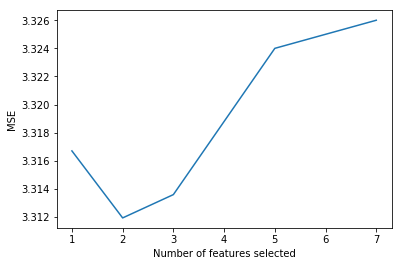

In [149]:
features=[1,2,3,5,7]
MSE_Test=[3.3167,3.31193,3.31359,3.324,3.326]
plt.plot(features,MSE_Test)
plt.xlabel('Number of features selected')
plt.ylabel('MSE')

In [242]:
import numpy as np
YRandomForest1=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF2_final.txt",delimiter=None)
YRandomForest2=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF3_final.txt",delimiter=None)
YRandomForest3=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF4_final.txt",delimiter=None)
YRandomForest4=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF5_final.txt",delimiter=None)
YRandomForest5=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF6_final.txt",delimiter=None)
YRandomForest6=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF7_final.txt",delimiter=None)
YRandomForest7=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF8_final.txt",delimiter=None)
YRandomForest8=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF9_final.txt",delimiter=None)
YRandomForest9=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF10_final.txt",delimiter=None)
YRandomForest10=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF11_final.txt",delimiter=None)
YRandomForest11=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF12_final.txt",delimiter=None)
YRandomForest12=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF13_final.txt",delimiter=None)
YRandomForest13=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_neural.txt",delimiter=None)
YRandomForest14=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF14_final.txt",delimiter=None)
YRandomForest0=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF1_final.txt",delimiter=None)
YRandomForest15=np.genfromtxt("/Users/dharshanbj/Desktop/Yte_Neural_finalbang.txt",delimiter=None)
# YRandomForest4=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF5.txt",delimiter=None)
# XTest=np.genfromtxt("/Users/dharshanbj/Desktop/X_test_project1.txt",delimiter=None)
end_data=((YRandomForest0[:,1]+YRandomForest1[:,1]+YRandomForest2[:,1]+YRandomForest3[:,1]+YRandomForest4[:,1]+YRandomForest5[:,1]+YRandomForest6[:,1]+YRandomForest7[:,1]+YRandomForest8[:,1]+YRandomForest9[:,1]+YRandomForest10[:,1]+YRandomForest11[:,1]+YRandomForest12[:,1]+YRandomForest13[:,1]+YRandomForest14[:,1]+YRandomForest15[:,1])/16)

#print(end_data)

np.savetxt('/Users/dharshanbj/Desktop/Yhat_merged_FinalSUB_dasd_new_14.txt',
np.vstack( (np.arange(len(end_data)) , end_data) ).T,'%d, %.2f',header='ID,Prediction',comments='',delimiter=',');

In [233]:
import numpy as np
np.random.seed(0)
#import mltools as ml
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


Xtr=np.genfromtxt("/Users/dharshanbj/Desktop/X_train_project1.txt",delimiter=None)
Ytr=np.genfromtxt("/Users/dharshanbj/Desktop/Y_train_project1.txt",delimiter=None)
XTest=np.genfromtxt("/Users/dharshanbj/Desktop/X_test_project1.txt",delimiter=None)

learners=[300]
for i in learners:
    regr=RandomForestRegressor(max_depth=125,min_samples_leaf=8,n_estimators=i,max_features=14)
    regr.fit(Xtr,Ytr)
    Ypred2=regr.predict(XTest)


# plt.plot(learners,MSE_training,c='red',label='Training error')
# plt.plot(learners,MSE_validation,c='green',label='Validation error')
# plt.xlabel('Learners')
# plt.ylabel('MSE')
# plt.legend()

np.savetxt('/Users/dharshanbj/Desktop/Yhat_RF14_final.txt',
np.vstack( (np.arange(len(end_data)) , end_data) ).T,'%d, %.2f',header='ID,Prediction',comments='',delimiter=',');